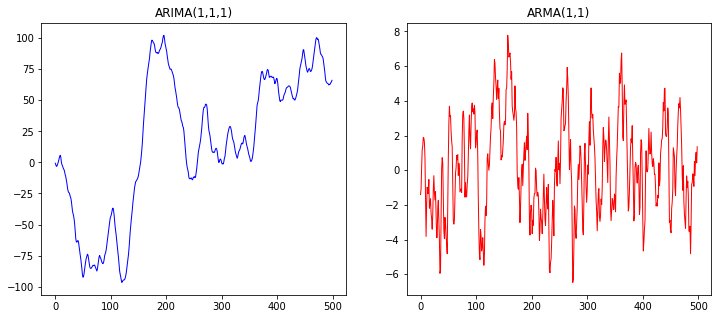

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from MyUtil.MyTimeSeries import sampleARIMA, checkNormality
from statsmodels.tsa.arima_model import ARIMA
y=sampleARIMA(ar=[0.8],d=1,ma=[0.5],n=500)
d=np.diff(y) #y의 차분

fig=plt.figure(figsize=(12,5))
p1=fig.add_subplot(1,2,1)
p2=fig.add_subplot(1,2,2)
p1.plot(y,color='b',linewidth=1)
p2.plot(d,color='red',linewidth=1)
p1.set_title("ARIMA(1,1,1)")
p2.set_title("ARMA(1,1)")
plt.show()
#ARIMA 는 왼쪽 그래프를 오른쪽으로 변환하여 예측이 가능하도록 만들기 위함

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  499
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -719.862
Method:                       css-mle   S.D. of innovations              1.022
Date:                Wed, 20 Feb 2019   AIC                           1447.723
Time:                        11:32:10   BIC                           1464.574
Sample:                             1   HQIC                          1454.336
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2760      0.283      0.974      0.331      -0.279       0.831
ar.L1.D.y      0.7569      0.032     23.494      0.000       0.694       0.820
ma.L1.D.y      0.5164      0.045     11.557      0.0

C:\Users\user\anac\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


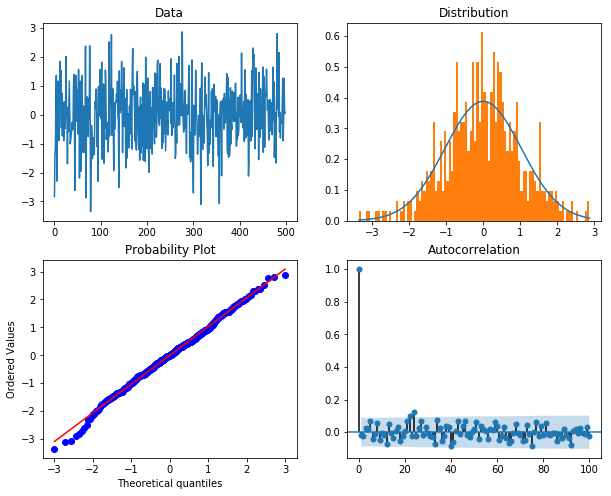

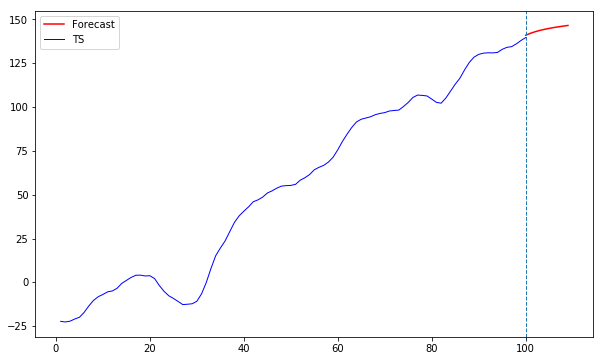

In [6]:
y=sampleARIMA(ar=[0.8],d=1,ma=[0.5],n=500)
model =ARIMA(y,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())
residual =model_fit.resid
checkNormality(residual)

forecast=model_fit.forecast(steps=10)[0]
ytail=y[len(y)-100:]
ax1=np.arange(1,len(ytail)+1)
ax2=np.arange(len(ytail),len(ytail)+len(forecast))
plt.figure(figsize=(10,6))
plt.plot(ax2,forecast,c='r',label='Forecast')
plt.plot(ax1,ytail,c='b',label='TS',linewidth=1)
plt.axvline(x=ax1[-1],linestyle='dashed',linewidth=1)
plt.legend()
plt.show()

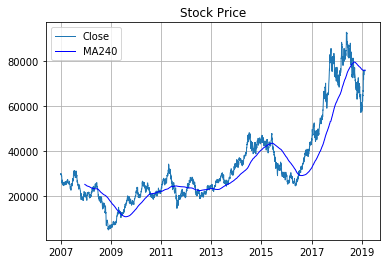

In [11]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt

start= dt.datetime(2007,1,1) #데이터 마지노선
end=dt.date.today()
#주가수정비율 반영 -> adjust_price=True
s=web.YahooDailyReader('000660.KS',start,end,adjust_price=True).read() 
plt.plot(s['Close'],linewidth=1)
s['sma240']=s['Close'].rolling(window=240).mean()
s=s.dropna()

plt.figure(1,figsize=(10,5))
plt.plot(s['sma240'],linewidth=1,c='b', label="MA240")
plt.title("Stock Price")
plt.grid()
plt.legend()
plt.show()

## sk하이닉스 종가 주가 예측하기

C:\Users\user\anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D2.sma240   No. Observations:                 2758
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -8400.631
Method:                       css-mle   S.D. of innovations              5.088
Date:                Wed, 20 Feb 2019   AIC                          16817.262
Time:                        11:50:19   BIC                          16864.640
Sample:                             2   HQIC                         16834.377
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0217      0.084      0.257      0.797      -0.144       0.187
ar.L1.D2.sma240    -0.3865      0.287     -1.348      0.178      -0.949       0.175
ar.L2.D2.sma240    -0.3679      

C:\Users\user\anac\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


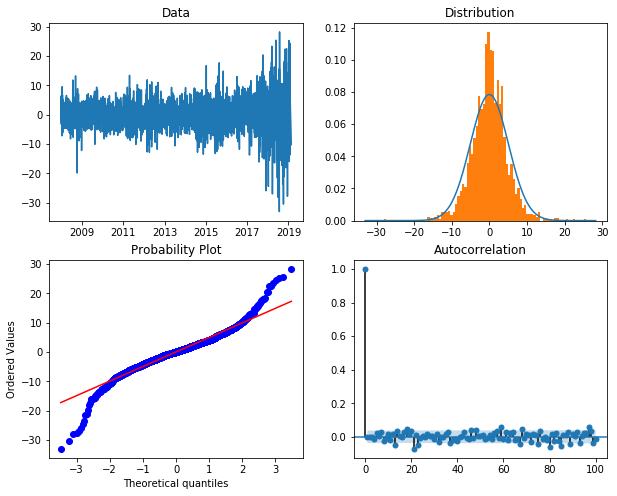

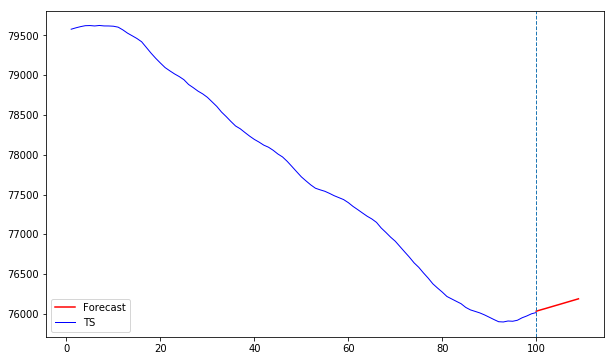

In [31]:
model=ARIMA(s['sma240'],order=(3,2,3)) #ARIMA모형은 들어맞지 않음
model_fit=model.fit()
print(model_fit.summary())
residual =model_fit.resid
checkNormality(residual)


y=s['sma240']
forecast=model_fit.forecast(steps=10)[0]
ytail=y[len(y)-100:]
ax1=np.arange(1,len(ytail)+1)
ax2=np.arange(len(ytail),len(ytail)+len(forecast))
plt.figure(figsize=(10,6))
plt.plot(ax2,forecast,c='r',label='Forecast')
plt.plot(ax1,ytail,c='b',label='TS',linewidth=1)
plt.axvline(x=ax1[-1],linestyle='dashed',linewidth=1)
plt.legend()
plt.show()

### keras

C:\Users\user\anac\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/300
4/4 [==============================] - 0s 67ms/step - loss: 0.2670
Epoch 2/300
4/4 [==============================] - 0s 0us/step - loss: 0.2557
Epoch 3/300
4/4 [==============================] - 0s 0us/step - loss: 0.2553
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2516
Epoch 5/300
4/4 [==============================] - 0s 0us/step - loss: 0.2521
Epoch 6/300
4/4 [==============================] - 0s 0us/step - loss: 0.2521
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2504
Epoch 8/300
4/4 [==============================] - 0s 1000us/step - loss: 0.2556
Epoch 9/300
4/4 [==============================] - 0s 1000us/step - loss: 0.2477
Epoch 10/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2478
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2473
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 13/300
4/4 [==============================] - 0s

4/4 [==============================] - 0s 750us/step - loss: 0.0770
Epoch 103/300
4/4 [==============================] - 0s 750us/step - loss: 0.0748
Epoch 104/300
4/4 [==============================] - 0s 750us/step - loss: 0.0724
Epoch 105/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0702
Epoch 106/300
4/4 [==============================] - 0s 750us/step - loss: 0.0686
Epoch 107/300
4/4 [==============================] - 0s 750us/step - loss: 0.0667
Epoch 108/300
4/4 [==============================] - 0s 750us/step - loss: 0.0653
Epoch 109/300
4/4 [==============================] - 0s 750us/step - loss: 0.0632
Epoch 110/300
4/4 [==============================] - 0s 500us/step - loss: 0.0610
Epoch 111/300
4/4 [==============================] - 0s 750us/step - loss: 0.0600
Epoch 112/300
4/4 [==============================] - 0s 750us/step - loss: 0.0581
Epoch 113/300
4/4 [==============================] - 0s 750us/step - loss: 0.0566
Epoch 114/300
4/4 [=============

4/4 [==============================] - 0s 1000us/step - loss: 0.0095
Epoch 203/300
4/4 [==============================] - 0s 1000us/step - loss: 0.0094
Epoch 204/300
4/4 [==============================] - 0s 750us/step - loss: 0.0093
Epoch 205/300
4/4 [==============================] - 0s 750us/step - loss: 0.0092
Epoch 206/300
4/4 [==============================] - 0s 750us/step - loss: 0.0090
Epoch 207/300
4/4 [==============================] - 0s 1000us/step - loss: 0.0089
Epoch 208/300
4/4 [==============================] - 0s 750us/step - loss: 0.0088
Epoch 209/300
4/4 [==============================] - 0s 750us/step - loss: 0.0087
Epoch 210/300
4/4 [==============================] - 0s 750us/step - loss: 0.0086
Epoch 211/300
4/4 [==============================] - 0s 750us/step - loss: 0.0084
Epoch 212/300
4/4 [==============================] - 0s 750us/step - loss: 0.0084
Epoch 213/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 214/300
4/4 [==========

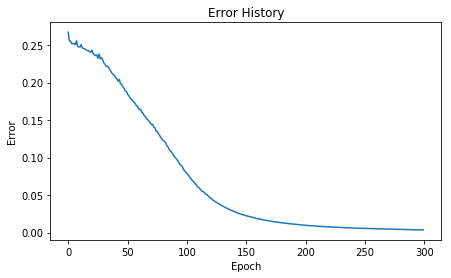

출력층 output:
[[0.02652405]
 [0.9339171 ]
 [0.9552873 ]
 [0.08266478]]


In [32]:
import numpy as np
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# XOR 계산을 위한 학습용 데이터를 구성한다
trainX = np.array([[0,0], [0,1], [1,0], [1,1]])     # 입력값 : 4 x 2 행렬
trainY = np.array([[0],[1],[1],[0]])                # 출력값 : 4 x 1 행렬

model = Sequential()
model.add(Dense(4, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr = 0.05)
model.compile(loss='mse', optimizer=adam)
history = model.fit(trainX, trainY, batch_size = 1, epochs = 300)

# 학습 데이터 성능 곡선을 그린다
plt.figure(1, figsize=(7, 4))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error History')
plt.show()

# 학습 데이터에 대한 인공신경망의 출력을 확인한다
predY = model.predict(trainX)
print("출력층 output:")
print(predY)


# DNN file

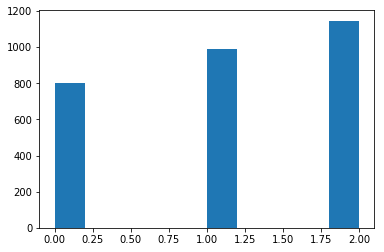

                macd       rsi       obv  liquidity  parkinson  volatility  \
Date                                                                         
2015-07-23 -0.109302 -2.016777  0.108753  -1.003774   0.254026    0.331592   
2010-12-03 -0.780993 -0.200139  0.285676  -0.118227  -0.025967    0.274985   
2016-12-13  0.369904  0.451464  0.363727  -0.513666  -0.766250   -0.875730   
2017-01-03  0.014289  1.135779  0.426698  -0.628310  -0.876919   -0.803586   
2012-03-21 -0.906085  0.346636  0.280972   1.405790  -0.893436   -0.978734   

            class  
Date               
2015-07-23    1.0  
2010-12-03    2.0  
2016-12-13    2.0  
2017-01-03    2.0  
2012-03-21    0.0  
Train on 2351 samples, validate on 588 samples
Epoch 1/1000
2351/2351 [==============================] - 0s 111us/step - loss: 1.1020 - acc: 0.3709 - val_loss: 1.0984 - val_acc: 0.3759
Epoch 2/1000
2351/2351 [==============================] - 0s 21us/step - loss: 1.0948 - acc: 0.3773 - val_loss: 1.0904 - val_acc

2351/2351 [==============================] - 0s 16us/step - loss: 0.9883 - acc: 0.4849 - val_loss: 0.9853 - val_acc: 0.4796
Epoch 56/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9875 - acc: 0.4858 - val_loss: 0.9849 - val_acc: 0.4881
Epoch 57/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9868 - acc: 0.4870 - val_loss: 0.9861 - val_acc: 0.4728
Epoch 58/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9865 - acc: 0.4879 - val_loss: 0.9855 - val_acc: 0.4813
Epoch 59/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9853 - acc: 0.4823 - val_loss: 0.9852 - val_acc: 0.4677
Epoch 60/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9847 - acc: 0.4862 - val_loss: 0.9847 - val_acc: 0.4898
Epoch 61/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9838 - acc: 0.4875 - val_loss: 0.9837 - val_acc: 0.4898
Epoch 62/1000
2351/2351 [=======================

2351/2351 [==============================] - 0s 16us/step - loss: 0.9559 - acc: 0.5194 - val_loss: 0.9711 - val_acc: 0.5153
Epoch 115/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9564 - acc: 0.5155 - val_loss: 0.9714 - val_acc: 0.5170
Epoch 116/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9557 - acc: 0.5177 - val_loss: 0.9712 - val_acc: 0.5136
Epoch 117/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9551 - acc: 0.5164 - val_loss: 0.9714 - val_acc: 0.5170
Epoch 118/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9550 - acc: 0.5125 - val_loss: 0.9710 - val_acc: 0.5170
Epoch 119/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9544 - acc: 0.5155 - val_loss: 0.9714 - val_acc: 0.5187
Epoch 120/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9540 - acc: 0.5100 - val_loss: 0.9713 - val_acc: 0.5119
Epoch 121/1000
2351/2351 [================

2351/2351 [==============================] - 0s 17us/step - loss: 0.9391 - acc: 0.5232 - val_loss: 0.9651 - val_acc: 0.5357
Epoch 174/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9395 - acc: 0.5232 - val_loss: 0.9645 - val_acc: 0.5340
Epoch 175/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9392 - acc: 0.5232 - val_loss: 0.9636 - val_acc: 0.5425
Epoch 176/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9384 - acc: 0.5232 - val_loss: 0.9641 - val_acc: 0.5391
Epoch 177/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9388 - acc: 0.5236 - val_loss: 0.9640 - val_acc: 0.5408
Epoch 178/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9381 - acc: 0.5266 - val_loss: 0.9647 - val_acc: 0.5408
Epoch 179/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9380 - acc: 0.5287 - val_loss: 0.9645 - val_acc: 0.5425
Epoch 180/1000
2351/2351 [================

2351/2351 [==============================] - 0s 16us/step - loss: 0.9272 - acc: 0.5385 - val_loss: 0.9647 - val_acc: 0.5374
Epoch 233/1000
2351/2351 [==============================] - 0s 17us/step - loss: 0.9267 - acc: 0.5415 - val_loss: 0.9644 - val_acc: 0.5357
Epoch 234/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9261 - acc: 0.5381 - val_loss: 0.9645 - val_acc: 0.5442
Epoch 235/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9268 - acc: 0.5432 - val_loss: 0.9666 - val_acc: 0.5442
Epoch 236/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9276 - acc: 0.5368 - val_loss: 0.9642 - val_acc: 0.5391
Epoch 237/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9257 - acc: 0.5423 - val_loss: 0.9636 - val_acc: 0.5391
Epoch 238/1000
2351/2351 [==============================] - 0s 17us/step - loss: 0.9283 - acc: 0.5393 - val_loss: 0.9676 - val_acc: 0.5323
Epoch 239/1000
2351/2351 [================

2351/2351 [==============================] - 0s 16us/step - loss: 0.9155 - acc: 0.5419 - val_loss: 0.9619 - val_acc: 0.5323
Epoch 292/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9151 - acc: 0.5440 - val_loss: 0.9599 - val_acc: 0.5272
Epoch 293/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9154 - acc: 0.5381 - val_loss: 0.9606 - val_acc: 0.5221
Epoch 294/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9145 - acc: 0.5415 - val_loss: 0.9605 - val_acc: 0.5187
Epoch 295/1000
2351/2351 [==============================] - 0s 13us/step - loss: 0.9152 - acc: 0.5427 - val_loss: 0.9597 - val_acc: 0.5221
Epoch 296/1000
2351/2351 [==============================] - 0s 18us/step - loss: 0.9138 - acc: 0.5427 - val_loss: 0.9606 - val_acc: 0.5272
Epoch 297/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9145 - acc: 0.5432 - val_loss: 0.9609 - val_acc: 0.5323
Epoch 298/1000
2351/2351 [================

2351/2351 [==============================] - 0s 15us/step - loss: 0.9043 - acc: 0.5479 - val_loss: 0.9614 - val_acc: 0.5221
Epoch 351/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9039 - acc: 0.5483 - val_loss: 0.9604 - val_acc: 0.5255
Epoch 352/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9068 - acc: 0.5487 - val_loss: 0.9609 - val_acc: 0.5306
Epoch 353/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9047 - acc: 0.5491 - val_loss: 0.9616 - val_acc: 0.5340
Epoch 354/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.9046 - acc: 0.5547 - val_loss: 0.9614 - val_acc: 0.5272
Epoch 355/1000
2351/2351 [==============================] - 0s 17us/step - loss: 0.9033 - acc: 0.5457 - val_loss: 0.9609 - val_acc: 0.5289
Epoch 356/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.9033 - acc: 0.5453 - val_loss: 0.9606 - val_acc: 0.5221
Epoch 357/1000
2351/2351 [================

2351/2351 [==============================] - 0s 15us/step - loss: 0.8945 - acc: 0.5530 - val_loss: 0.9615 - val_acc: 0.5255
Epoch 410/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8981 - acc: 0.5521 - val_loss: 0.9628 - val_acc: 0.5204
Epoch 411/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8957 - acc: 0.5530 - val_loss: 0.9613 - val_acc: 0.5136
Epoch 412/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8945 - acc: 0.5564 - val_loss: 0.9604 - val_acc: 0.5136
Epoch 413/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8943 - acc: 0.5555 - val_loss: 0.9597 - val_acc: 0.5238
Epoch 414/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8948 - acc: 0.5572 - val_loss: 0.9605 - val_acc: 0.5170
Epoch 415/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8956 - acc: 0.5564 - val_loss: 0.9591 - val_acc: 0.5306
Epoch 416/1000
2351/2351 [================

2351/2351 [==============================] - 0s 15us/step - loss: 0.8851 - acc: 0.5598 - val_loss: 0.9574 - val_acc: 0.5238
Epoch 469/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8855 - acc: 0.5644 - val_loss: 0.9582 - val_acc: 0.5289
Epoch 470/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8855 - acc: 0.5666 - val_loss: 0.9579 - val_acc: 0.5255
Epoch 471/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8849 - acc: 0.5610 - val_loss: 0.9588 - val_acc: 0.5221
Epoch 472/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8856 - acc: 0.5657 - val_loss: 0.9587 - val_acc: 0.5357
Epoch 473/1000
2351/2351 [==============================] - 0s 14us/step - loss: 0.8845 - acc: 0.5657 - val_loss: 0.9581 - val_acc: 0.5289
Epoch 474/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8838 - acc: 0.5674 - val_loss: 0.9579 - val_acc: 0.5306
Epoch 475/1000
2351/2351 [================

2351/2351 [==============================] - 0s 16us/step - loss: 0.8751 - acc: 0.5734 - val_loss: 0.9606 - val_acc: 0.5340
Epoch 528/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8750 - acc: 0.5751 - val_loss: 0.9611 - val_acc: 0.5323
Epoch 529/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8748 - acc: 0.5734 - val_loss: 0.9610 - val_acc: 0.5340
Epoch 530/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8749 - acc: 0.5734 - val_loss: 0.9624 - val_acc: 0.5391
Epoch 531/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8751 - acc: 0.5755 - val_loss: 0.9614 - val_acc: 0.5391
Epoch 532/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8743 - acc: 0.5746 - val_loss: 0.9606 - val_acc: 0.5408
Epoch 533/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8745 - acc: 0.5695 - val_loss: 0.9611 - val_acc: 0.5408
Epoch 534/1000
2351/2351 [================

2351/2351 [==============================] - 0s 15us/step - loss: 0.8688 - acc: 0.5746 - val_loss: 0.9609 - val_acc: 0.5204
Epoch 587/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8663 - acc: 0.5819 - val_loss: 0.9612 - val_acc: 0.5204
Epoch 588/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8662 - acc: 0.5823 - val_loss: 0.9601 - val_acc: 0.5238
Epoch 589/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8655 - acc: 0.5866 - val_loss: 0.9602 - val_acc: 0.5255
Epoch 590/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8660 - acc: 0.5827 - val_loss: 0.9606 - val_acc: 0.5221
Epoch 591/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8653 - acc: 0.5844 - val_loss: 0.9606 - val_acc: 0.5238
Epoch 592/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8660 - acc: 0.5823 - val_loss: 0.9623 - val_acc: 0.5238
Epoch 593/1000
2351/2351 [================

2351/2351 [==============================] - 0s 15us/step - loss: 0.8604 - acc: 0.5900 - val_loss: 0.9620 - val_acc: 0.5187
Epoch 646/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8588 - acc: 0.5887 - val_loss: 0.9608 - val_acc: 0.5170
Epoch 647/1000
2351/2351 [==============================] - 0s 14us/step - loss: 0.8586 - acc: 0.5891 - val_loss: 0.9617 - val_acc: 0.5119
Epoch 648/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8582 - acc: 0.5900 - val_loss: 0.9609 - val_acc: 0.5187
Epoch 649/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8584 - acc: 0.5895 - val_loss: 0.9611 - val_acc: 0.5102
Epoch 650/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8575 - acc: 0.5938 - val_loss: 0.9614 - val_acc: 0.5119
Epoch 651/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8575 - acc: 0.5853 - val_loss: 0.9623 - val_acc: 0.5153
Epoch 652/1000
2351/2351 [================

2351/2351 [==============================] - 0s 16us/step - loss: 0.8521 - acc: 0.5921 - val_loss: 0.9623 - val_acc: 0.5170
Epoch 705/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8533 - acc: 0.5921 - val_loss: 0.9620 - val_acc: 0.5170
Epoch 706/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8516 - acc: 0.5921 - val_loss: 0.9630 - val_acc: 0.5102
Epoch 707/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8510 - acc: 0.5883 - val_loss: 0.9618 - val_acc: 0.5068
Epoch 708/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8516 - acc: 0.5870 - val_loss: 0.9604 - val_acc: 0.5102
Epoch 709/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8519 - acc: 0.5870 - val_loss: 0.9590 - val_acc: 0.5136
Epoch 710/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8512 - acc: 0.5904 - val_loss: 0.9602 - val_acc: 0.5170
Epoch 711/1000
2351/2351 [================

2351/2351 [==============================] - 0s 15us/step - loss: 0.8469 - acc: 0.5955 - val_loss: 0.9632 - val_acc: 0.5170
Epoch 764/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8464 - acc: 0.5874 - val_loss: 0.9640 - val_acc: 0.5102
Epoch 765/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8454 - acc: 0.5912 - val_loss: 0.9641 - val_acc: 0.5119
Epoch 766/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8456 - acc: 0.5934 - val_loss: 0.9632 - val_acc: 0.5102
Epoch 767/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8455 - acc: 0.5921 - val_loss: 0.9640 - val_acc: 0.5102
Epoch 768/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8453 - acc: 0.5929 - val_loss: 0.9638 - val_acc: 0.5068
Epoch 769/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8449 - acc: 0.5900 - val_loss: 0.9646 - val_acc: 0.5051
Epoch 770/1000
2351/2351 [================

2351/2351 [==============================] - 0s 16us/step - loss: 0.8412 - acc: 0.5938 - val_loss: 0.9670 - val_acc: 0.5034
Epoch 823/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8412 - acc: 0.5904 - val_loss: 0.9659 - val_acc: 0.5000
Epoch 824/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8407 - acc: 0.6010 - val_loss: 0.9675 - val_acc: 0.4983
Epoch 825/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8432 - acc: 0.5980 - val_loss: 0.9671 - val_acc: 0.5136
Epoch 826/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8409 - acc: 0.5951 - val_loss: 0.9663 - val_acc: 0.5102
Epoch 827/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8442 - acc: 0.5887 - val_loss: 0.9672 - val_acc: 0.5136
Epoch 828/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8430 - acc: 0.5917 - val_loss: 0.9620 - val_acc: 0.5153
Epoch 829/1000
2351/2351 [================

2351/2351 [==============================] - 0s 15us/step - loss: 0.8392 - acc: 0.5951 - val_loss: 0.9655 - val_acc: 0.5102
Epoch 882/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8387 - acc: 0.5908 - val_loss: 0.9651 - val_acc: 0.5051
Epoch 883/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8383 - acc: 0.5972 - val_loss: 0.9659 - val_acc: 0.5068
Epoch 884/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8395 - acc: 0.5963 - val_loss: 0.9664 - val_acc: 0.5119
Epoch 885/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8376 - acc: 0.6010 - val_loss: 0.9645 - val_acc: 0.5085
Epoch 886/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8367 - acc: 0.6006 - val_loss: 0.9638 - val_acc: 0.5085
Epoch 887/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8367 - acc: 0.5968 - val_loss: 0.9647 - val_acc: 0.5068
Epoch 888/1000
2351/2351 [================

2351/2351 [==============================] - 0s 16us/step - loss: 0.8340 - acc: 0.5963 - val_loss: 0.9607 - val_acc: 0.5051
Epoch 941/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8337 - acc: 0.5980 - val_loss: 0.9625 - val_acc: 0.5119
Epoch 942/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8363 - acc: 0.6019 - val_loss: 0.9664 - val_acc: 0.5136
Epoch 943/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8391 - acc: 0.5993 - val_loss: 0.9640 - val_acc: 0.5051
Epoch 944/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8339 - acc: 0.5972 - val_loss: 0.9660 - val_acc: 0.5085
Epoch 945/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8340 - acc: 0.5980 - val_loss: 0.9655 - val_acc: 0.5017
Epoch 946/1000
2351/2351 [==============================] - 0s 15us/step - loss: 0.8327 - acc: 0.6031 - val_loss: 0.9656 - val_acc: 0.5017
Epoch 947/1000
2351/2351 [================

2351/2351 [==============================] - 0s 17us/step - loss: 0.8303 - acc: 0.5963 - val_loss: 0.9645 - val_acc: 0.5136
Epoch 1000/1000
2351/2351 [==============================] - 0s 16us/step - loss: 0.8295 - acc: 0.5972 - val_loss: 0.9631 - val_acc: 0.5119


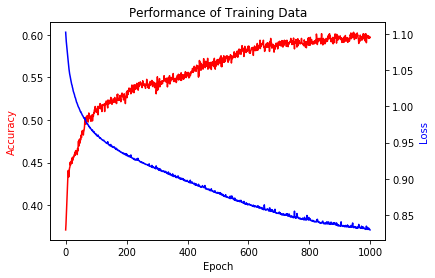

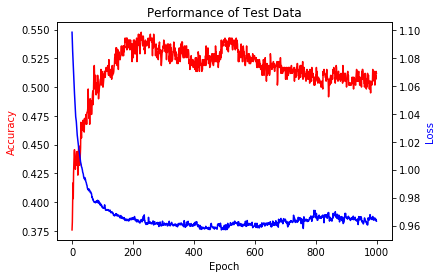


* 향후 주가는 하락할 것으로 예상됨.
* 주가 횡보 확률 = 0.22 %
* 주가 하락 확률 = 85.08 %
* 주가 상승 확률 = 14.70 %


In [35]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from MyUtil import YahooData, FeatureSet

# Yahoo site로부터 삼성전자 주가 데이터를 수집한다
#sam = YahooData.getStockDataYahoo('000660.KS', '2007-01-01')

# 저장된 파일을 읽어온다
sam = pd.read_pickle('20190220/StockData/000660.KS') #sk하이닉스, 폴더 안에 들어있음
sam = sam.dropna()

# 주가 데이터 (OHLCV)로부터 기술적분석 지표들을 추출한다
# u = 0.8 : 수익률 표준편차의 0.8 배 이상이면 주가 상승 (class = 2)
# d = -0.8 : 수익률 표준편차의 -0.8배 이하이면 주가 하락 (class = 1)
# 아니면 주가 횡보 (classs = 0)
ft = FeatureSet.getFeatureSet(sam, u=0.6, d=-0.6, period=20)
plt.hist(ft['class'])
plt.show()


# 분석할 데이터를 읽어와서 적당히 섞은 후 80%는 학습데이터로, 20%는 시험 데이터로 사용한다
ft = shuffle(ft)
print(ft.head())
nLen = len(ft)
n = int(nLen * 0.8) - 1
trainX = ft.iloc[0:n,0:6].values
trainY = np_utils.to_categorical(ft.iloc[0:n,6].values)
testX = ft.iloc[n:(nLen-1),0:6].values
testY = np_utils.to_categorical(ft.iloc[n:(nLen-1),6].values)

# 인공신경망 모델을 생성함.
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
adam = optimizers.Adam(lr = 0.0005)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# 학습 (Learning)
history = model.fit(trainX, trainY, batch_size = 50, epochs = 1000, validation_data=(testX, testY))

# 학습 데이터 성능 곡선을 그린다
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(history.history['acc'], color='red')
ax2.plot(history.history['loss'], color='blue')
ax1.set_xlabel("Epoch")
ax1.set_title("Performance of Training Data")
ax1.set_ylabel("Accuracy", color='red')
ax2.set_ylabel("Loss", color='blue')
plt.show()

# 시험 데이터 성능 곡선을 그린다
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(history.history['val_acc'], color='red')
ax2.plot(history.history['val_loss'], color='blue')
ax1.set_xlabel("Epoch")
ax1.set_title("Performance of Test Data")
ax1.set_ylabel("Accuracy", color='red')
ax2.set_ylabel("Loss", color='blue')
plt.show()

# 금일 측정된 Feature가 아래와 같다면, 향후 주가의 방향은 ?
todayX = np.array([[-0.23,-1.45,0.85,0.43,-0.38,0.5]])
predY = model.predict(todayX)
predClass = np.argmax(predY)
print()
if predClass == 0:
    print("* 향후 주가는 횡보할 것으로 예상됨.")
elif predClass == 1:
    print("* 향후 주가는 하락할 것으로 예상됨.")
else:
    print("* 향후 주가는 상승할 것으로 예상됨.")

# 출력층의 출력값을 출력함.
print("* 주가 횡보 확률 = %.2f %s" % (predY[0][0] * 100, '%'))
print("* 주가 하락 확률 = %.2f %s" % (predY[0][1] * 100, '%'))
print("* 주가 상승 확률 = %.2f %s" % (predY[0][2] * 100, '%'))

# weight 값을 출력해 본다
#np.set_printoptions(precision=3)
#for layer in model.layers:
#    weights = layer.get_weights()
#    print(weights)
#    print()